# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

La idea del proyecto es realizar un análisis de nuestros clientes para poder entender como es su comportamiento al utilizar 
nuestros servicios, nuestro objetivo principal es obtener la mayor cantidad de informacion posible sobre el uso de las 
tarifas que ofrecemos, cuanto tiempo navegan por internet, ingresos generados de cada una, etc. para poder encontrar 
como se relacionan entre si y ayudar a cumplir el objetivo que es utilizar todo esto para ajustar el presupuesto de 
publicidad que tendrá la empresa.

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt 

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

## Preparar los datos

 ### DataSet 'USERS'

In [3]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Al observar la información de la tabla USERS encontramos varios inconvenientes:

       1. Tenemos solamente 34 valores NO NULOS en la columna CHURN_DATE, lo cual nos indica que los demás valores son nulos
          porque al momento de registrar los datos, la tarifa de los usuarios se encontraba activa.
       2. La columna USER_ID se encuentra en un formato incorrecto al ser del tipo INT64, debemos cambiarlo a OBJECT porque 
          no podemos realizar cálculos (operaciones) útiles con ésta columna.
       3. Las columnas REG_DATE y CHURN_DATE tambien cuentan con un formato incorrecto, ya que sus datos deben ser del tipo
          TIMESTAMPS.


### DataSet 'CALLS' 

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Aqui podemos observar que nuestro DataSet CALLS NO tiene columnas con valores nulos, sin embargo, encontramos que:

    1. La columna USER_ID es tipo INT64, por lo que lo convertiremos a OBJECT.
    2. La columna CALL_DATE tambien tiene un tipo de dato incorrecto, por lo que debemos convertirla al tipo de fecha.

In [6]:
calls.sample(10)

,id,user_id,call_date,duration
69403,1249_224,1249,2018-07-20,0.00
127344,1456_158,1456,2018-12-15,26.68
134288,1488_462,1488,2018-09-24,0.00
8069,1039_9,1039,2018-09-11,3.11
115191,1403_265,1403,2018-04-21,5.39
127965,1459_109,1459,2018-11-21,6.00
72697,1257_437,1257,2018-10-22,7.06
101367,1362_107,1362,2018-07-01,0.00
98265,1352_778,1352,2018-10-03,2.64
70703,1251_714,1251,2018-06-17,2.36


### DataSet 'INTERNET' 

In [7]:
internet.sample(10)

,id,user_id,session_date,mb_used
99001,1467_138,1467,2018-10-25,373.21
39870,1179_201,1179,2018-08-11,114.88
14473,1066_367,1066,2018-09-24,60.24
27819,1127_657,1127,2018-09-16,78.35
29263,1133_395,1133,2018-10-23,500.65
101657,1487_42,1487,2018-12-18,405.96
88426,1408_145,1408,2018-05-19,372.75
824,1004_509,1004,2018-11-14,234.25
3521,1020_92,1020,2018-12-05,308.04
83283,1389_175,1389,2018-12-19,477.94


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


En este DataFrame observamos los mismos inconvenientes con los tipos de datos que en CALLS:

    1. La columna USER_ID era tipo INT64, por lo que lo convertimos a OBJECT.
    2. La columna SESSION_DATE tambien tiene un tipo de dato incorrecto, por lo que debemos convertirla al tipo de fecha.

### DataSet 'MESSAGES' 

In [9]:
messages.sample(10)

,id,user_id,message_date
62103,1388_97,1388,2018-12-27
59814,1380_272,1380,2018-10-13
20103,1128_72,1128,2018-12-04
59261,1374_435,1374,2018-12-20
18787,1122_16,1122,2018-10-29
37320,1247_484,1247,2018-08-07
74542,1480_81,1480,2018-12-28
22975,1137_519,1137,2018-12-28
70988,1462_96,1462,2018-12-01
38706,1254_262,1254,2018-09-04


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


En este DataFrame observamos los mismos inconvenientes con los tipos de datos que en los dos anteriores:

    1. La columna USER_ID era tipo INT64, por lo que lo convertimos a OBJECT.
    2. La columna MESSAGE_DATE tambien tiene un tipo de dato incorrecto, por lo que debemos convertirla al tipo de fecha.

### DataSet  'PLANS'

In [11]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [12]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


Podemos observar que ésta tabla solamente contiene dos filas completamente diferentes por lo que descartamos toda posibilidad de tener valores duplicados tanto EXPLÍCITOS como IMPLÍCITOS. Además debido a la información que contiene cada columna, todos los tipos de datos son correctos y NO tenemos valores nulos, lo que signficia que podemos hacer uso de ella sin modificaciones.

## Tarifas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
# Imprime una muestra de los datos para las tarifas
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

DATOS CORREGIDOS EN 1.3.5 DataSet 'PLANS'

## Enriquecer los datos

Podemos agregar una columna en la que tengamos cuanto es el costo unitario de cada mb en cada plan. Con la finalidad de poder usarlo en nuestro análisis, ya que podria darnos una mejor visualizacion de porque se cancelan los planes.

In [15]:
plans['usd_per_mb_included'] = plans['usd_monthly_pay'] / plans['mb_per_month_included']

## Usuarios/as

In [16]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
# Imprime una muestra de datos para usuarios
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaN
162,1162,Mark,Farley,20,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,ultimate,NaN
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10
256,1256,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,surf,NaN
179,1179,Darcey,Baird,22,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaN
105,1105,Micheal,Poole,57,"Providence-Warwick, RI-MA MSA",2018-01-08,surf,NaN
336,1336,Vance,Bradshaw,34,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-04-04,surf,NaN
165,1165,Nigel,Huber,20,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-27,surf,NaN
53,1053,Piper,Espinoza,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-30,surf,NaN


### Corregir los datos

In [18]:
users[~users['churn_date'].isna()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07


2. Debemos cambiar el tipo de dato de USER_ID a OBJECT, esto con ayuda de ASTYPE().

In [19]:
users['user_id'] = users['user_id'].astype('str')  

3. Debemos cambiar a TIMESTAMPS las columnas REG_DATE y CHURN_DATE con ayuda de TO_DATETIME.

In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Ahora confirmaremos que nuestros cambios se corrieron correctamente llamando al método info() nuevamente:

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


Ahora, analizaremos si tenemos datos DUPLICADOS EXPLICITOS e IMPLICITOS

In [22]:
print('DATOS DUPLICADOS: ', users.duplicated().sum())
print()
print('CONTEO DE VALORES ÚNICOS POR COLUMNA:', '\n',users.nunique())

DATOS DUPLICADOS:  0

CONTEO DE VALORES ÚNICOS POR COLUMNA: 
 user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64


Como podemos ver, no existen datos duplicados EXPLICITOS en nuestro DataSet USERS y al evaluar el conteo de los valores únicos
en cada columna nos damos cuenta que en la mayoria de las columnas tenemos datos repetidos  (lo cual es normal debido al tipo 
de informacion que guarda cada columna), sin embargo, tenemos que analizar columna a columna para identificar que no tengamos
valores duplicados IMPLICITOS.

Las columnas FIRST_NAME, LAST_NAME, AGE, PLAN, USER_ID no es necesario evaluarlas para encontrar datos duplicados IMPLICITOS debido a que pudiera existir diferentes formas de escribir nombres o apellidos similares, en el caso de la edad es imposible saber si el usuario en realidad tiene 58 u 85 años (en caso de error de captura) solo revisando los datos, para plan solo tenemos dos valores y el id de usuario no se repite. 

Datos duplicados en la columna CITY:

In [23]:
print(users['city'].unique())

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

En CITY NO tenenemos datos duplicados de forma implícita.

Datos DUPLICADOS IMPLÍCITOS en la columna REG_DATE: Aqui debemos confirmar que todas las fechas tengan el formato Y-M-D, es decir, que no existan errores de captura y se haya colocado el dia en donde va el mes y viceversa. Para esto, ningun mes deberia tener un valor mayor a '12' y ningun dia deberia ser mayor a '31' o solo tener valores entre '01' y '12'.

In [24]:
print(users['reg_date'].unique())

['2018-12-24T00:00:00.000000000' '2018-08-13T00:00:00.000000000'
 '2018-10-21T00:00:00.000000000' '2018-01-28T00:00:00.000000000'
 '2018-05-23T00:00:00.000000000' '2018-11-29T00:00:00.000000000'
 '2018-11-27T00:00:00.000000000' '2018-07-11T00:00:00.000000000'
 '2018-08-03T00:00:00.000000000' '2018-04-22T00:00:00.000000000'
 '2018-03-09T00:00:00.000000000' '2018-01-18T00:00:00.000000000'
 '2018-06-28T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2018-11-25T00:00:00.000000000' '2018-12-05T00:00:00.000000000'
 '2018-10-25T00:00:00.000000000' '2018-08-26T00:00:00.000000000'
 '2018-10-17T00:00:00.000000000' '2018-01-16T00:00:00.000000000'
 '2018-11-08T00:00:00.000000000' '2018-12-21T00:00:00.000000000'
 '2018-04-20T00:00:00.000000000' '2018-07-06T00:00:00.000000000'
 '2018-08-21T00:00:00.000000000' '2018-10-28T00:00:00.000000000'
 '2018-07-20T00:00:00.000000000' '2018-06-26T00:00:00.000000000'
 '2018-02-21T00:00:00.000000000' '2018-01-05T00:00:00.000000000'
 '2018-02-14T00:00:00.000

En REG_DATE NO tenemos valores duplicados implícitos.

Datos DUPLICADOS IMPLÍCITOS en la columna CHURN_DATE: Aqui debemos realizar el mismo análisis que hicimos para REG_DATE.

In [25]:
print(users['churn_date'].unique())

[                          'NaT' '2018-12-18T00:00:00.000000000'
 '2018-11-16T00:00:00.000000000' '2018-09-07T00:00:00.000000000'
 '2018-12-30T00:00:00.000000000' '2018-10-07T00:00:00.000000000'
 '2018-12-31T00:00:00.000000000' '2018-11-24T00:00:00.000000000'
 '2018-11-11T00:00:00.000000000' '2018-12-12T00:00:00.000000000'
 '2018-11-14T00:00:00.000000000' '2018-12-27T00:00:00.000000000'
 '2018-11-29T00:00:00.000000000' '2018-12-22T00:00:00.000000000'
 '2018-11-30T00:00:00.000000000' '2018-10-13T00:00:00.000000000'
 '2018-07-31T00:00:00.000000000' '2018-12-15T00:00:00.000000000'
 '2018-12-19T00:00:00.000000000' '2018-10-03T00:00:00.000000000'
 '2018-10-22T00:00:00.000000000' '2018-08-16T00:00:00.000000000'
 '2018-12-26T00:00:00.000000000' '2018-09-01T00:00:00.000000000'
 '2018-11-21T00:00:00.000000000' '2018-08-19T00:00:00.000000000'
 '2018-12-10T00:00:00.000000000' '2018-09-17T00:00:00.000000000'
 '2018-11-18T00:00:00.000000000' '2018-09-18T00:00:00.000000000']


En CHURN_DATE NO tenemos valores duplicados implícitos.

### Enriquecer los datos

Podemos realizar una combinacion de la tabla USERS y PLANS mediante MERGE() para tener la información junta y usarla en nuestro analisis futuro.

In [26]:
users_and_plans = users.merge(plans, left_on = 'plan', right_on = 'plan_name').drop('plan_name',axis='columns')
users_and_plans.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,usd_per_mb_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,0.002279
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,0.002279
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,0.002279
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,0.002279
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,0.002279


## Llamadas

In [27]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [28]:
# Imprime una muestra de datos para las llamadas
calls.sample(10)

,id,user_id,call_date,duration
50399,1181_799,1181,2018-09-21,6.97
90102,1327_27,1327,2018-11-02,0.00
108443,1382_1816,1382,2018-11-23,10.06
15152,1061_94,1061,2018-11-03,5.16
13652,1058_72,1058,2018-11-11,16.99
122505,1433_76,1433,2018-12-26,0.00
15096,1061_38,1061,2018-12-26,10.16
485,1003_95,1003,2018-12-27,7.70
135117,1490_217,1490,2018-08-13,13.24
119893,1417_629,1417,2018-08-15,3.55


Aplicaremos un redondeo a la columna 'duration'

In [29]:
calls['duration'] = np.ceil(calls['duration'])

Al revisar la tabla CALLS, MESSAGES e INTERNET nos damos cuenta de que todas tienen el mismo nombre de columna 'ID', sin emabrgo, almacenan información diferente, por lo que al crear una base de datos relacional con todas nuestras tablas no podremos hacerlo correctamente, ya que, NO SON NOMBRES ÚNICOS, por lo que debemos cambiarlos.

### Corregir los datos

Debemos corregir los detalles enciontrados en 1.3. Adicional debemos cambiar el nombre de la columna 'id'

In [30]:
calls['user_id']=calls['user_id'].astype('str')

In [31]:
calls['call_date'] = pd.to_datetime(calls['call_date'] , format = '%Y-%m-%d')

Llamamos nuevamente el método info() para comprobar nuestros cambios.

In [32]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


Ahora debemos evaluar si existen datos duplicados EXPLICITOS.

In [33]:
calls.duplicated().sum()

0

No tenemos duplicados EXPLÍCITOS, ahora veamos los IMPLÍCITOS:

In [34]:
calls.nunique()

id           137735
user_id         481
call_date       351
duration         38
dtype: int64

Para éste caso, no es necesario evaluar los valores únicos de las columnas porque el ID no tiene valores repetidos, el USER_ID, CALL_DATE y DURATION no son columnas en las que podamos determinar si existieron errores de captura por la naturaleza de los datos que contienen.

In [35]:
calls.rename(columns = {'id':'call_id'}, inplace=True)

### Enriquecer los datos

In [36]:
calls['duration'].describe()

count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Basado en la informacion que nos arroja 'describe()' podemos agregar una columna donde categoricemos la duracion de las llamadas basado en los valores de cada percentil.

In [37]:

mask_short_call = calls['duration'] < 5.98
mask_standard_call = (5.98 <= calls['duration']) & (calls['duration'] < 10.69)
mask_extended_call = calls['duration'] >= 10.69

calls.loc[mask_short_call, 'call_type'] = 'short call'
calls.loc[mask_standard_call, 'call_type'] = 'standard call'
calls.loc[mask_extended_call, 'call_type'] = 'extended call'


Es de utilidad extraer el mes en el que fueron realizadas dichas llamadas por nuestros usuarios.

In [38]:
months = {'1': 'Enero','2':'Febrero', '3':'Marzo','4':'Abril','5':'Mayo','6':'Junio','7':'Julio','8':'Agosto','9':'Septiembre','10':'Octubre','11':'Noviembre','12':'Diciembre'}
calls['month'] = calls['call_date'].dt.month
calls['month'] = calls['month'].astype('str').replace(months)
calls.sample(20)

,call_id,user_id,call_date,duration,call_type,month
108712,1384_19,1384,2018-10-22,14.0,extended call,Octubre
75507,1268_11,1268,2018-09-22,0.0,short call,Septiembre
32142,1120_607,1120,2018-10-23,21.0,extended call,Octubre
22129,1082_63,1082,2018-06-16,5.0,short call,Junio
26101,1099_426,1099,2018-09-02,0.0,short call,Septiembre
115989,1406_215,1406,2018-12-23,0.0,short call,Diciembre
104702,1368_417,1368,2018-08-14,6.0,standard call,Agosto
16453,1064_311,1064,2018-09-09,5.0,short call,Septiembre
131443,1472_444,1472,2018-04-21,0.0,short call,Abril
17486,1066_598,1066,2018-12-09,0.0,short call,Diciembre


In [39]:
calls

,call_id,user_id,call_date,duration,call_type,month
0,1000_93,1000,2018-12-27,9.0,standard call,Diciembre
1,1000_145,1000,2018-12-27,14.0,extended call,Diciembre
2,1000_247,1000,2018-12-27,15.0,extended call,Diciembre
3,1000_309,1000,2018-12-28,6.0,standard call,Diciembre
4,1000_380,1000,2018-12-30,5.0,short call,Diciembre
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,standard call,Noviembre
137731,1499_200,1499,2018-10-20,11.0,extended call,Octubre
137732,1499_201,1499,2018-09-21,9.0,standard call,Septiembre
137733,1499_202,1499,2018-10-10,1.0,short call,Octubre


## Mensajes

In [40]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [41]:
# Imprime una muestra de datos para los mensajes
messages.sample(10)

,id,user_id,message_date
40348,1260_287,1260,2018-12-10
50704,1330_117,1330,2018-12-07
62128,1391_41,1391,2018-12-25
57940,1365_96,1365,2018-08-21
39343,1255_594,1255,2018-08-04
72937,1470_565,1470,2018-09-03
21864,1132_1377,1132,2018-05-05
26086,1159_89,1159,2018-12-06
43206,1285_20,1285,2018-11-03
37644,1249_149,1249,2018-07-09


Al revisar la tabla CALLS, MESSAGES e INTERNET nos damos cuenta de que todas tienen el mismo nombre de columna 'ID', sin emabrgo, almacenan información diferente, por lo que al crear una base de datos relacional con todas nuestras tablas no podremos hacerlo correctamente, ya que, NO SON NOMBRES ÚNICOS, por lo que debemos cambiarlos.

### Corregir los datos

DATOS CORREGIDOS EN 1.3.4 DataSet 'MESSAGES'. Adicional, debemos cambiar el nombre de la columna 'id'.

1. Cambiar USER_ID a tipo OBJECT:

In [42]:
messages['user_id'] = messages['user_id'].astype('str')

2. Cambiar a tipo de fecha la columna MESSAGE_DATE:

In [43]:
messages['message_date'] = pd.to_datetime(messages['message_date'] , format = '%Y-%m-%d')

Llamamos nuevamente al método info() para verificar nuestros cambios:

In [44]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


Ahora evaluaremos si existen valores duplicados EXPLÍCITOS:

In [45]:
messages.duplicated().sum()

0

No contamos con filas duplicadas de forma EXPLÍCITA, ahora debemos evaluar los duplicados IMPLÍCITOS:

In [46]:
messages.nunique()

id              76051
user_id           402
message_date      351
dtype: int64

Al igual que los datasets CALLS e INTERNET, a pesar de que tenemos valores duplicados en las columnas USER_ID y MESSAGE_DATE no es necesario evaluarlas una a una debido a que la naturaleza de lo permite y en el caso de ID, no podemos determinar a simple vista si existen posibles errores de captura.

In [47]:
messages.rename(columns = {'id':'message_id'}, inplace=True)

### Enriquecer los datos

Puede ser de ayuda crear una nueva columna donde almacenemos el día y otra donde almacenemos el mes para conocer mas a fondo cuando tenemos mayor cantidad de mensajes enviados por nuestros usuarios.

In [48]:
messages['day_message_sent'] = messages['message_date'].dt.day

In [49]:
messages['month'] = messages['message_date'].dt.month
messages['month'] = messages['month'].astype('str').replace(months)

messages.sample(20)

,message_id,user_id,message_date,day_message_sent,month
22417,1133_560,1133,2018-09-04,4,Septiembre
5615,1053_113,1053,2018-08-12,12,Agosto
25078,1148_78,1148,2018-11-05,5,Noviembre
40308,1260_66,1260,2018-12-05,5,Diciembre
55944,1354_94,1354,2018-09-18,18,Septiembre
35379,1229_603,1229,2018-12-30,30,Diciembre
15470,1101_527,1101,2018-04-26,26,Abril
52296,1336_262,1336,2018-12-27,27,Diciembre
13271,1088_245,1088,2018-10-29,29,Octubre
25344,1151_187,1151,2018-08-25,25,Agosto


## Internet

In [50]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [51]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10)

,id,user_id,session_date,mb_used
86216,1400_351,1400,2018-06-16,349.38
5480,1030_79,1030,2018-10-21,206.14
99227,1467_364,1467,2018-07-10,379.47
2020,1010_189,1010,2018-03-26,0.00
12747,1061_244,1061,2018-10-16,711.01
67237,1312_460,1312,2018-10-14,446.76
93178,1434_429,1434,2018-09-22,145.84
39545,1178_130,1178,2018-12-16,751.96
43076,1191_255,1191,2018-08-30,1288.75
11544,1056_211,1056,2018-10-25,396.08


Al revisar la tabla CALLS, MESSAGES e INTERNET nos damos cuenta de que todas tienen el mismo nombre de columna 'ID', sin emabrgo, almacenan información diferente, por lo que al crear una base de datos relacional con todas nuestras tablas no podremos hacerlo correctamente, ya que, NO SON NOMBRES ÚNICOS, por lo que debemos cambiarlos.

Debemos realizar la conversion de MB a GB y un redondeo hacia arriba por las condiciones de cobro especificadas, por lo tanto, tambien debemos renombrar la columnas MB_USED a 'GB_USED'

In [52]:
internet['mb_used'] = np.ceil(internet['mb_used'] / 1024)
internet.rename({'mb_used':'gb_used'},axis='columns',inplace = True)

### Corregir los datos

DATOS CORREGIDOS EN 1.3.3 DataSet 'INTERNET'. Adicional, debemos cambiar el nombre de la columna 'id'.

1. Cambiar USER_ID a tipo OBJECT:

In [53]:
internet['user_id'] = internet['user_id'].astype('str')

2. Cambiar al tipo fecha la columna SESSION_DATE:

In [54]:
 internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')


Llamamos nuevamente el método info() para comprobar nuestros cambios.

In [55]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


Ahora evaluaremos si existen valores duplicados EXPLÍCITOS:

In [56]:
internet.duplicated().sum()

0

No existen filas duplicadas, por lo tanto, ahora debemos evaluar los datos duplicados IMPLÍCITOS:

In [57]:
internet.nunique()

id              104825
user_id            489
session_date       351
gb_used              3
dtype: int64

Para éste caso, no es necesario evaluar los valores únicos de las columnas no podemos determinar si existieron errores de captura por la naturaleza de los datos que contienen.

In [58]:
internet.rename(columns = {'id':'session_id'}, inplace=True)

### Enriquecer los datos

Al igual que en MESSAGES, puede ser de ayuda crear una nueva columna donde almacenemos el día y otra donde almacenemos el mes para conocer mas a fondo cuando tenemos mayor cantidad de sesiones iniciadas por nuestros usuarios.

In [59]:
internet['session_day'] = internet['session_date'].dt.day

In [60]:
internet['month'] = internet['session_date'].dt.month
internet['month'] = internet['month'].astype('str').replace(months)

messages.sample(20)

,message_id,user_id,message_date,day_message_sent,month
10007,1076_39,1076,2018-12-26,26,Diciembre
72487,1470_115,1470,2018-12-14,14,Diciembre
17150,1113_259,1113,2018-07-04,4,Julio
38421,1252_259,1252,2018-10-31,31,Octubre
10298,1076_677,1076,2018-09-16,16,Septiembre
57480,1362_567,1362,2018-03-11,11,Marzo
53914,1342_1,1342,2018-12-18,18,Diciembre
24114,1144_624,1144,2018-09-12,12,Septiembre
11271,1077_542,1077,2018-12-05,5,Diciembre
50960,1331_135,1331,2018-12-16,16,Diciembre


## Estudiar las condiciones de las tarifas

In [61]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb_included
0,50,15360,500,20,10,0.03,0.03,surf,0.001302
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.002279


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [62]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_and_month = calls.groupby(['user_id','month']).size()
calls_per_user_and_month

user_id  month     
1000     Diciembre     16
1001     Agosto        27
         Diciembre     56
         Noviembre     64
         Octubre       65
                       ..
1498     Septiembre    45
1499     Diciembre     65
         Noviembre     45
         Octubre       53
         Septiembre    41
Length: 2258, dtype: int64

In [63]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_and_month = calls.groupby(['user_id','month'])['duration'].sum()
minutes_per_user_and_month

user_id  month     
1000     Diciembre     124.0
1001     Agosto        182.0
         Diciembre     412.0
         Noviembre     426.0
         Octubre       393.0
                       ...  
1498     Septiembre    363.0
1499     Diciembre     496.0
         Noviembre     308.0
         Octubre       385.0
         Septiembre    346.0
Name: duration, Length: 2258, dtype: float64

In [64]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_and_month = messages.groupby(['user_id','month']).size()
messages_per_user_and_month

user_id  month     
1000     Diciembre     11
1001     Agosto        30
         Diciembre     44
         Noviembre     36
         Octubre       53
                       ..
1496     Diciembre     11
         Noviembre     13
         Octubre       18
         Septiembre    21
1497     Diciembre     50
Length: 1806, dtype: int64

In [65]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user_and_month = internet.groupby(['user_id','month'])['gb_used'].sum()
internet_per_user_and_month

user_id  month     
1000     Diciembre      4.0
1001     Agosto        21.0
         Diciembre     55.0
         Noviembre     49.0
         Octubre       50.0
                       ... 
1498     Septiembre    52.0
1499     Diciembre     58.0
         Noviembre     43.0
         Octubre       52.0
         Septiembre    37.0
Name: gb_used, Length: 2277, dtype: float64

Ahora debemos juntar todas las tablas agrupadas anteriormente para tener toda la informacion de los usuarios y meses en un solo lugar.

In [66]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
usage_information = pd.concat([calls_per_user_and_month, minutes_per_user_and_month, messages_per_user_and_month,
                               internet_per_user_and_month], axis='columns')
usage_information.columns = ['total_calls','used_minutes','sent_messages','total_gb_used']
usage_information.reset_index(inplace=True)
usage_information=usage_information.fillna(0)
usage_information.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   object 
 1   month          2293 non-null   object 
 2   total_calls    2293 non-null   float64
 3   used_minutes   2293 non-null   float64
 4   sent_messages  2293 non-null   float64
 5   total_gb_used  2293 non-null   float64
dtypes: float64(4), object(2)
memory usage: 107.6+ KB


Para unir la informacion de las tarifas debemos usar las tablas USERS_AND_PLANS y USAGE_INFORMATION para asi poder usar la columna 'user_id' como nexo, de lo contrario no podriamos realizar dicha operación.

In [67]:
# Añade la información de la tarifa
users['month'] = '0'
usage_plan_info  = pd.merge(usage_information, users_and_plans, on='user_id', how='left')
usage_plan_info.drop(['first_name','last_name','reg_date','churn_date','usd_per_gb','usd_per_message','usd_per_minute',
                      'messages_included','mb_per_month_included','minutes_included','usd_per_mb_included'],
                     axis='columns',inplace=True)
usage_plan_info

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,age,city,plan,usd_monthly_pay
0,1000,Diciembre,16.0,124.0,11.0,4.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70
1,1001,Agosto,27.0,182.0,30.0,21.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20
2,1001,Diciembre,56.0,412.0,44.0,55.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20
3,1001,Noviembre,64.0,426.0,36.0,49.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20
4,1001,Octubre,65.0,393.0,53.0,50.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20
...,...,...,...,...,...,...,...,...,...,...
2288,1498,Septiembre,45.0,363.0,0.0,52.0,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20
2289,1499,Diciembre,65.0,496.0,0.0,58.0,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,20
2290,1499,Noviembre,45.0,308.0,0.0,43.0,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,20
2291,1499,Octubre,53.0,385.0,0.0,52.0,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,20


In [68]:
# Calcula el ingreso mensual para cada usuario
income_per_user = usage_plan_info.groupby(['user_id','month'])['usd_monthly_pay'].sum()
income_per_user


user_id  month     
1000     Diciembre     70
1001     Agosto        20
         Diciembre     20
         Noviembre     20
         Octubre       20
                       ..
1498     Septiembre    20
1499     Diciembre     20
         Noviembre     20
         Octubre       20
         Septiembre    20
Name: usd_monthly_pay, Length: 2293, dtype: int64

## Estudia el comportamiento de usuario

### Llamadas

Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla:

Primero debemos tener un DataFrame donde tengamos nuestra informacion de consumo mensual de cada cliente y la duración de las llamadas, para eso debemos concatenar USAGE_PLAN_INFO y CALLS.

In [69]:
usage_plan_info['mean_calls_duration'] = usage_plan_info['used_minutes'] / usage_plan_info['total_calls']
usage_plan_info.head()

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,age,city,plan,usd_monthly_pay,mean_calls_duration
0,1000,Diciembre,16.0,124.0,11.0,4.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,7.750000
1,1001,Agosto,27.0,182.0,30.0,21.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.740741
2,1001,Diciembre,56.0,412.0,44.0,55.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,7.357143
3,1001,Noviembre,64.0,426.0,36.0,49.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.656250
4,1001,Octubre,65.0,393.0,53.0,50.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.046154


DURACIÓN PROMEDIO DE CADA LLAMADA POR CADA PLAN Y POR MES.

In [70]:
mean_calls_duration = usage_plan_info.groupby(['month','plan'])['mean_calls_duration'].mean()
mean_calls_duration_df = pd.DataFrame(mean_calls_duration)
mean_calls_duration_df.reset_index(inplace=True)
mean_calls_duration_df

,month,plan,mean_calls_duration
0,Abril,surf,7.040349
1,Abril,ultimate,7.215266
2,Agosto,surf,7.127926
3,Agosto,ultimate,7.018966
4,Diciembre,surf,7.218351
5,Diciembre,ultimate,7.065425
6,Enero,surf,6.642857
7,Enero,ultimate,6.201915
8,Febrero,surf,6.814628
9,Febrero,ultimate,7.062303


Grafica de MEAN_CALLS_DURATION_DF

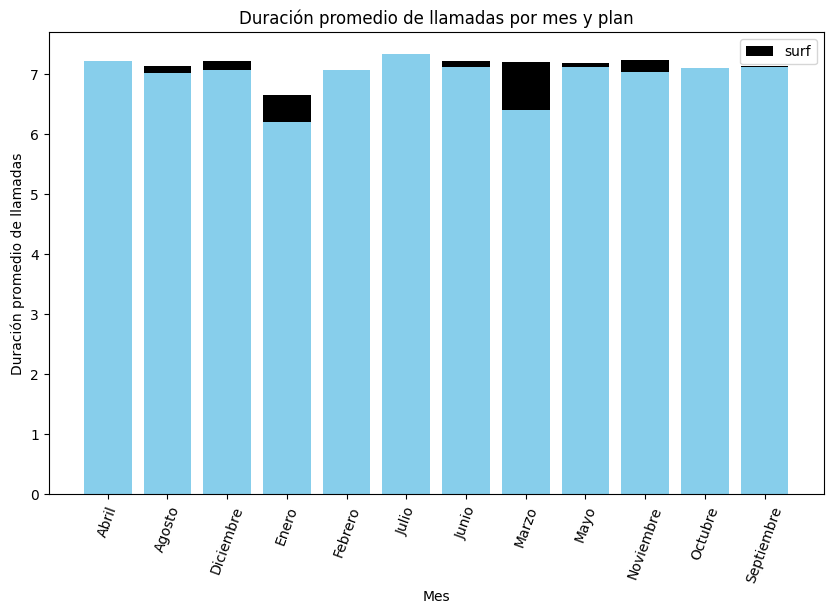

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(mean_calls_duration_df['month'], mean_calls_duration_df['mean_calls_duration'], color=['black', 'skyblue'])
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas')
plt.title('Duración promedio de llamadas por mes y plan')
plt.legend(['surf', 'ultimate'])
plt.xticks(rotation=70) 
plt.show()

In [72]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
monthly_used_minutes = usage_plan_info.groupby(['month','plan'])['used_minutes'].sum()
monthly_used_minutes_df = pd.DataFrame(monthly_used_minutes)
monthly_used_minutes_df.reset_index(inplace=True)
monthly_used_minutes_df

,month,plan,used_minutes
0,Abril,surf,17577.0
1,Abril,ultimate,7074.0
2,Agosto,surf,66438.0
3,Agosto,ultimate,29922.0
4,Diciembre,surf,150680.0
5,Diciembre,ultimate,69324.0
6,Enero,surf,406.0
7,Enero,ultimate,774.0
8,Febrero,surf,2673.0
9,Febrero,ultimate,2822.0


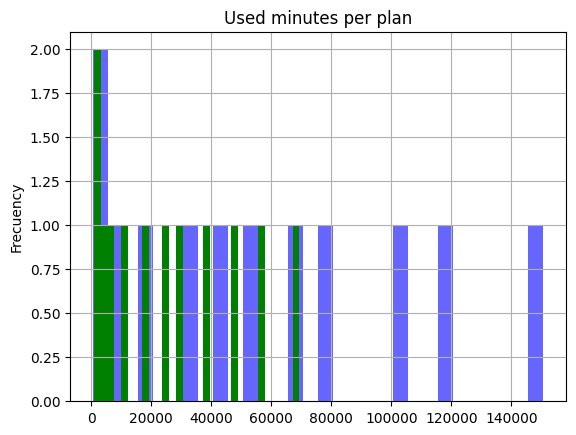

In [73]:
surf_used_minutes = monthly_used_minutes_df[monthly_used_minutes_df['plan']=='surf']
ultimate_used_minutes = monthly_used_minutes_df[monthly_used_minutes_df['plan']=='ultimate']
surf_used_minutes['used_minutes'].hist(bins=30, alpha=0.6,color='blue')
plt.title('Used minutes per plan')
plt.ylabel('Frecuency')
ultimate_used_minutes['used_minutes'].hist(bins=30, color='green')
plt.show()

Como podemos observar en nuestro histograma, tenemos mucha variación en nuestros datos que repersentan los minutos usados, lo que indicaría que los clientes no son para nada regulares al momento de realizar llamadas, por lo que da punto a sospechar que tenemos valores atípicos o extremos, para confirmar debemos analizar nuestro rango intercuartílico con ayuda de una gráfica de cajas y bigotes.

<AxesSubplot:xlabel='used_minutes'>

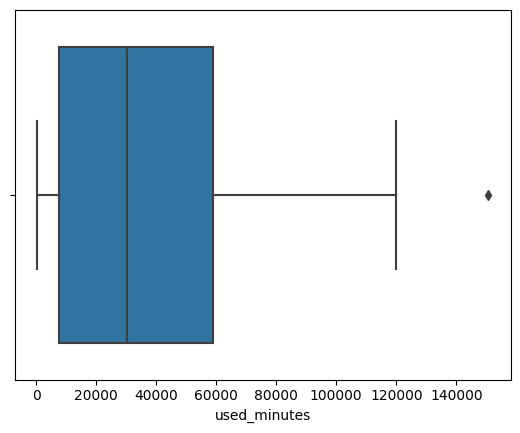

In [74]:
sns.boxplot(monthly_used_minutes_df['used_minutes'])

Podemos observar que nuestra sospecha era cierta, tenemos un valor atípico en el número de minutos consumidos) y valores con un rango muy extenso lo cual indica una gran variabilidad en las duraciones de uso, que a pesar de no ser valores atípicos están afectando a nuestra distribución en el histograma, es por eso que tambien vemos muy poca variación en la grafica de columnas sobre la duración promedio de las llamadas, ya que, la media se ve muy afectada por éstos valores. Una mejor opción para visualizar la distribución de nuestros datos sería una CURVA DE DENSIDADES.

Esto se ve de mejor manera cuando vemos la dispersion de nuestros datos y la cantidad de valores atípicos en la duracion de llamadas registradas en el DataFrame original CALLS

<AxesSubplot:xlabel='duration'>

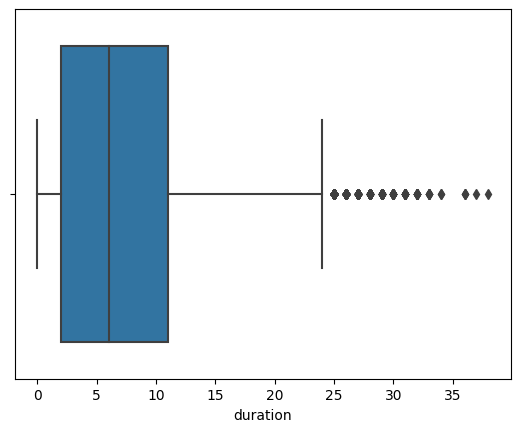

In [75]:
sns.boxplot(calls['duration'])

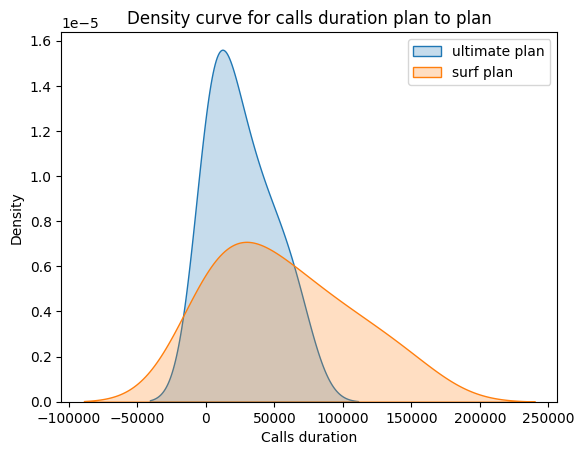

In [76]:
sns.kdeplot(ultimate_used_minutes['used_minutes'], fill=True)
sns.kdeplot(surf_used_minutes['used_minutes'], fill=True)
plt.xlabel("Calls duration")
plt.ylabel("Density")
plt.title("Density curve for calls duration plan to plan")
plt.legend(['ultimate plan','surf plan'])
plt.show()

Ahora, debemos calcular la media y la varianza para averiguar si los usuarios de los distintos planes se comportan diferente al realizar sus llamadas.

In [77]:
# Calcula la media y la varianza de la duración mensual de llamadas.
calls_by_month = usage_plan_info.groupby('month')
calls_monthly_mean = calls_by_month['mean_calls_duration'].mean()
calls_monthly_var = calls_by_month['mean_calls_duration'].var()
print('MEAN PER MONTH')
print(calls_monthly_mean)
print()
print('VARIANCE PER MONTH')
print(calls_monthly_var)

MEAN PER MONTH
month
Abril         7.092085
Agosto        7.094290
Diciembre     7.168816
Enero         6.348896
Febrero       6.913698
Julio         7.125630
Junio         7.181995
Marzo         6.923545
Mayo          7.165714
Noviembre     7.170887
Octubre       7.099580
Septiembre    7.124582
Name: mean_calls_duration, dtype: float64

VARIANCE PER MONTH
month
Abril         0.900561
Agosto        1.193826
Diciembre     0.764645
Enero         2.627217
Febrero       1.212845
Julio         0.922365
Junio         0.830266
Marzo         1.366525
Mayo          1.174741
Noviembre     1.707180
Octubre       1.269174
Septiembre    0.955248
Name: mean_calls_duration, dtype: float64


<AxesSubplot:xlabel='mean_calls_duration'>

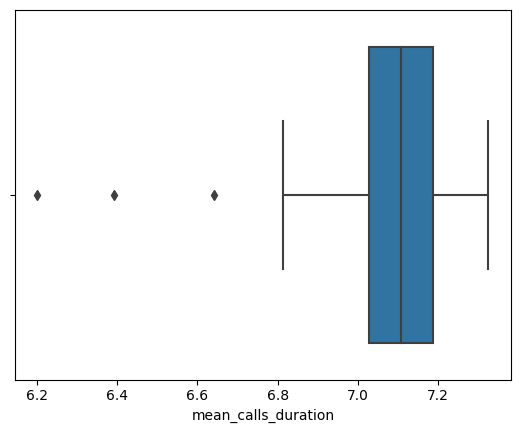

In [78]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(mean_calls_duration_df['mean_calls_duration'])

Si analizamos mes a mes nuestros promedios y la varianza de la duración de llamadas podriamos concluir que NO EXISTE diferencia en el comportamiento según el plan, ya que como observamos, los promedios son muy cercanos entre sí, sin embargo esta conclusión es errónea porque como vemos en la gráfica de cajas y bigotes hecha en base a la duración de llamadas (sin tomar en cuenta el plan) tenemos valores atípicos, lo que nos indica que tenemos una influencia de éstos en nuestros cálculos de la media. En la gráfica de densidades podemos darnos cuenta que en realidad SI existe diferencia en el comportamiento de los clientes en cada plan, siendo asi que los clientes del plan ULTIMATE son mas 'regulares' en su consumo de minutos mes a mes, contrario a los clientes del plan SURF donde observamos que hay clientes que consumen mas minutos que los del otros plan, es menor la probabilidad de que ésto suceda debido a la gran dispersión de la curva. 

### Mensajes

Primero debemos identificar la tabla donde tenemos contenida la información que nos será útil para el análisis, en este caso es la tabla USAGE_PLAN_INFO, la cual debemos agrupar por mes y por plan para en base a el resultado poder realizar nuestro gráfico.

Grafica de mensajes enviados por mes y por plan.

In [79]:
messages_info = usage_plan_info.groupby(['month','plan'])['sent_messages'].sum()
messages_info = pd.DataFrame(messages_info)
messages_info.reset_index(inplace=True)
messages_info

,month,plan,sent_messages
0,Abril,surf,870.0
1,Abril,ultimate,463.0
2,Agosto,surf,4662.0
3,Agosto,ultimate,2732.0
4,Diciembre,surf,12275.0
5,Diciembre,ultimate,6796.0
6,Enero,surf,21.0
7,Enero,ultimate,62.0
8,Febrero,surf,108.0
9,Febrero,ultimate,151.0


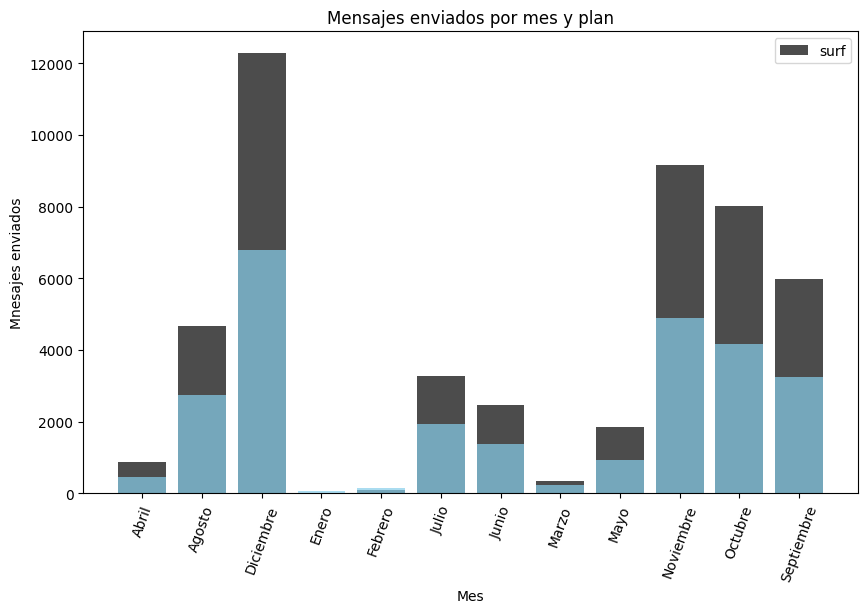

In [80]:
plt.figure(figsize=(10, 6))
plt.bar(messages_info['month'], messages_info['sent_messages'], color=['black', 'skyblue'],alpha = 0.7)
plt.xlabel('Mes')
plt.ylabel('Mnesajes enviados')
plt.title('Mensajes enviados por mes y plan')
plt.legend(['surf', 'ultimate'])
plt.xticks(rotation=70) 
plt.show()

Ahora debemos confirmar que no existan valores atípicos con ayuda de una caja de cajas y bigotes.

<AxesSubplot:xlabel='sent_messages'>

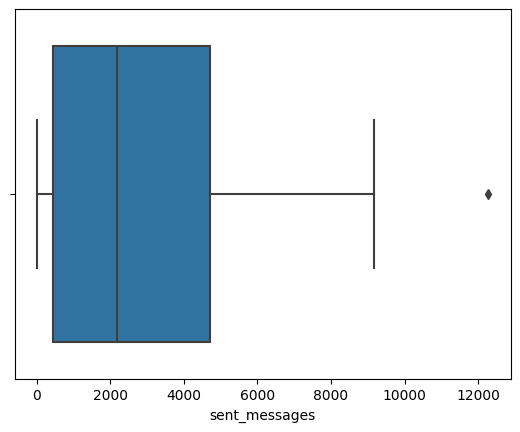

In [81]:
sns.boxplot(messages_info['sent_messages'])

Podemos observar que tenemos un valor atípico en el número de mensajes enviados y valores con un rango muy extenso lo cual indica una gran variabilidad en las duraciones de uso, que a pesar de no ser valores atípicos afectarían a nuestra distribución en el histograma ya que, la media se ve muy afectada por éstos valores. Una mejor opción para visualizar la distribución de nuestros datos sería una CURVA DE DENSIDADES.

Esto se ve de mejor manera cuando vemos la dispersion de nuestros datos y la cantidad de valores atípicos en la cantidad de mensajes enviados registrados en el DataFrame de consumo USAGE_PLAN_INFO

<AxesSubplot:xlabel='sent_messages'>

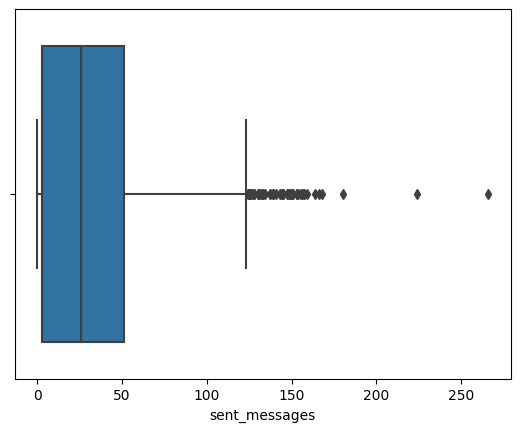

In [82]:
sns.boxplot(usage_plan_info['sent_messages'])

CURVA DE DENSIDADES

In [83]:
surf_sent_messages= messages_info[messages_info['plan']=='surf']
ultimate_sent_messages= messages_info[messages_info['plan']=='ultimate']

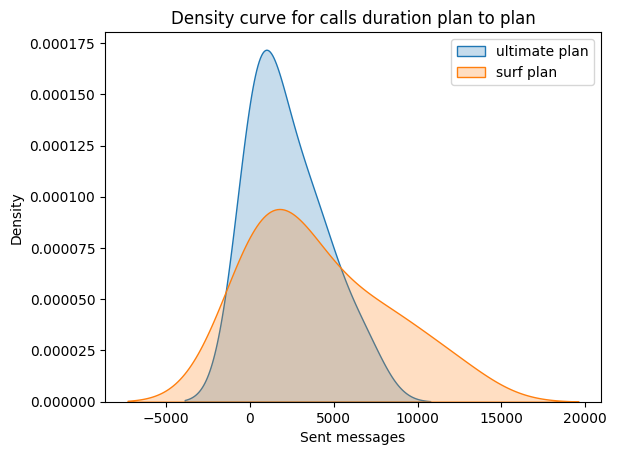

In [84]:
sns.kdeplot(ultimate_sent_messages['sent_messages'], fill=True)
sns.kdeplot(surf_sent_messages['sent_messages'], fill=True)
plt.xlabel("Sent messages")
plt.ylabel("Density")
plt.title("Density curve for calls duration plan to plan")
plt.legend(['ultimate plan','surf plan'])
plt.show()

In [85]:
messages_by_month = usage_plan_info.groupby('month')
messages_monthly_mean = messages_by_month['sent_messages'].mean()
messages_monthly_var = messages_by_month['sent_messages'].var()
print('MEAN PER MONTH')
print(messages_monthly_mean)
print()
print('VARIANCE PER MONTH')
print(messages_monthly_var)

MEAN PER MONTH
month
Abril         18.774648
Agosto        31.733906
Diciembre     40.663113
Enero         13.833333
Febrero       16.187500
Julio         28.933333
Junio         26.618056
Marzo         16.971429
Mayo          26.226415
Noviembre     34.312195
Octubre       35.571429
Septiembre    32.953571
Name: sent_messages, dtype: float64

VARIANCE PER MONTH
month
Abril          511.148491
Agosto        1095.446130
Diciembre     1493.270880
Enero          238.966667
Febrero        421.229167
Julio          938.051397
Junio          893.706245
Marzo          441.734454
Mayo           972.291105
Noviembre     1122.582003
Octubre       1261.771930
Septiembre    1025.442281
Name: sent_messages, dtype: float64


<AxesSubplot:xlabel='sent_messages'>

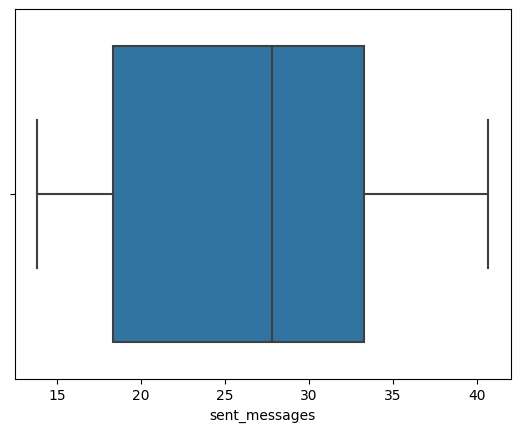

In [86]:
sns.boxplot(messages_monthly_mean)

Si analizamos nuestra ultima grafica de cajas y bigotes podemos confirmar que tenemos una gran variabilidad de mensajes enviados segun el mes, lo que se ve reflejado en una gran variedad en los valores de las medias, por lo tanto, la gráfica de densidades nos indica que SI EXISTE diferente comportamiento entre los clientes de cada plan, siendo asi que las personas del plan ULTIMATE tienen una menor dispersion en sus datos, a diferencia de la gente que tiene SURF, lo que señala que son mas 'constantes' en su consumo de mensajes al igual que en las llamadas.

### Internet

Primero debemos identificar la tabla donde tenemos contenida la información que nos será útil para el análisis, en este caso es la tabla USAGE_PLAN_INFO, la cual debemos agrupar por mes y por plan para en base a el resultado poder realizar nuestro gráfico.

In [87]:
internet_info = usage_plan_info.groupby(['month','plan'])['total_gb_used'].sum()
internet_info = pd.DataFrame(internet_info)
internet_info.reset_index(inplace=True)
internet_info

,month,plan,total_gb_used
0,Abril,surf,1444.0
1,Abril,ultimate,807.0
2,Agosto,surf,6525.0
3,Agosto,ultimate,3026.0
4,Diciembre,surf,13976.0
5,Diciembre,ultimate,6701.0
6,Enero,surf,28.0
7,Enero,ultimate,61.0
8,Febrero,surf,270.0
9,Febrero,ultimate,278.0


Ahora debemos confirmar la existencia de datos atípicos

<AxesSubplot:xlabel='total_gb_used'>

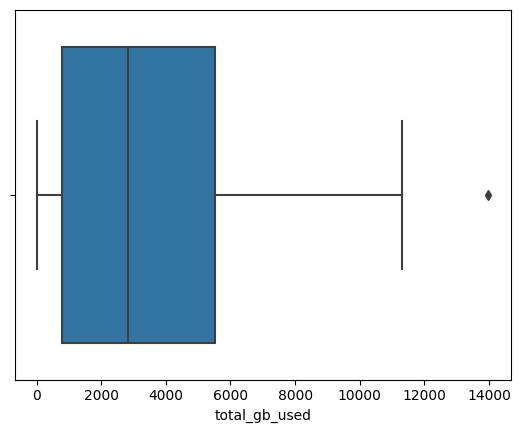

In [88]:
sns.boxplot(internet_info['total_gb_used'])

Podemos observar que tenemos un valor atípico en la cantidad de mb usados y valores con un rango muy extenso lo cual indica una gran variabilidad en las duraciones de uso, que a pesar de no ser valores atípicos afectarían a nuestra distribución en el histograma ya que, la media se ve muy afectada por éstos valores. Una mejor opción para visualizar la distribución de nuestros datos sería una CURVA DE DENSIDADES.

Esto se puede observar mejor con una grafica de cajas y bigotes de todo el DataFrame de consumo

<AxesSubplot:xlabel='total_gb_used'>

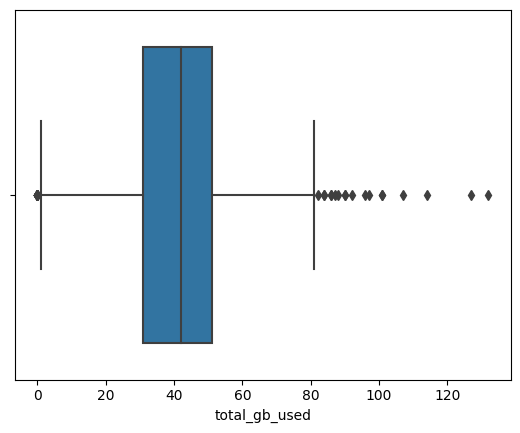

In [89]:
sns.boxplot(usage_plan_info['total_gb_used'])

CURVA DE DENSIDADES

In [90]:
surf_used_mb= internet_info[internet_info['plan']=='surf']
ultimate_used_mb= internet_info[internet_info['plan']=='ultimate']

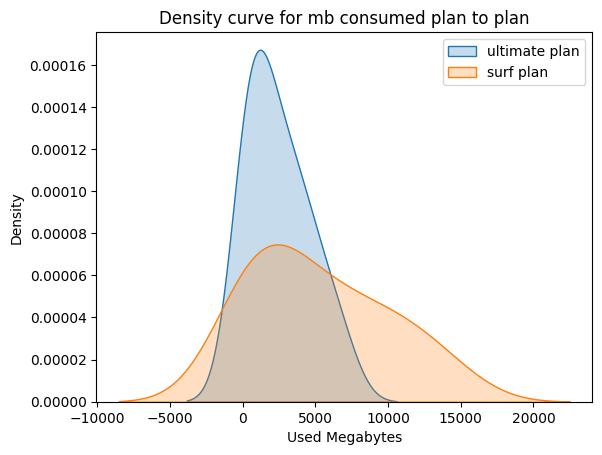

In [91]:
sns.kdeplot(ultimate_used_mb['total_gb_used'], fill=True)
sns.kdeplot(surf_used_mb['total_gb_used'], fill=True)
plt.xlabel("Used Megabytes")
plt.ylabel("Density")
plt.title("Density curve for mb consumed plan to plan")
plt.legend(['ultimate plan','surf plan'])
plt.show()

In [92]:
internet_by_month = usage_plan_info.groupby('month')
mb_monthly_mean = internet_by_month['total_gb_used'].mean()
mb_monthly_var = internet_by_month['total_gb_used'].var()
print('MEAN PER MONTH')
print(mb_monthly_mean)
print()
print('VARIANCE PER MONTH')
print(mb_monthly_var)

MEAN PER MONTH
month
Abril         31.704225
Agosto        40.991416
Diciembre     44.087420
Enero         14.833333
Febrero       34.250000
Julio         40.061111
Junio         36.972222
Marzo         34.342857
Mayo          35.339623
Noviembre     40.197561
Octubre       41.854227
Septiembre    40.296429
Name: total_gb_used, dtype: float64

VARIANCE PER MONTH
month
Abril         363.439839
Agosto        333.413719
Diciembre     320.695333
Enero          61.366667
Febrero       297.000000
Julio         310.940379
Junio         264.628594
Marzo         456.467227
Mayo          300.912129
Noviembre     277.596571
Octubre       279.440677
Septiembre    240.553392
Name: total_gb_used, dtype: float64


<AxesSubplot:xlabel='total_gb_used'>

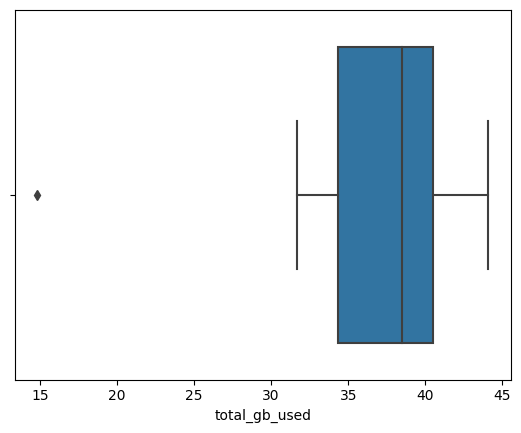

In [93]:
sns.boxplot(mb_monthly_mean)

Si analizamos nuestra ultima grafica de cajas y bigotes podemos confirmar que tenemos una gran variabilidad de mb utilizados, incluso tenemos un valor atípico en los mismos, lo que se ve reflejado en una gran variedad en los valores de las medias, por lo tanto, la gráfica de densidades nos indica que SI EXISTE diferente comportamiento entre los clientes de cada plan, siendo asi que las personas del plan ULTIMATE tienen una menor dispersion en sus datos, a diferencia de la gente que tiene SURF, lo que señala que son mas 'constantes' al momento de navegar por internet.

## Ingreso

Para evaluar los ingresos por cada plan, primero debemos crear nuestro DataFrame de consumo adaptado para los mismos. Se pretende darle respuesta a 3 preguntas:

    1. ¿Cuanto pagaron los usuarios por su plan?
    2. Si se excedieron en minutos, llamadas y/o mb, ¿Cuánto pagaron extra?
    3. ¿Cuanto espero seguir recibiendo de ingresos? (Basado en el status del plan)

In [94]:
usage_plan_info.head(10)

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,age,city,plan,usd_monthly_pay,mean_calls_duration
0,1000,Diciembre,16.0,124.0,11.0,4.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,7.750000
1,1001,Agosto,27.0,182.0,30.0,21.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.740741
2,1001,Diciembre,56.0,412.0,44.0,55.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,7.357143
3,1001,Noviembre,64.0,426.0,36.0,49.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.656250
4,1001,Octubre,65.0,393.0,53.0,50.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.046154
5,1001,Septiembre,49.0,315.0,44.0,41.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.428571
6,1002,Diciembre,47.0,384.0,41.0,37.0,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,20,8.170213
7,1002,Noviembre,55.0,386.0,32.0,45.0,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,20,7.018182
8,1002,Octubre,11.0,59.0,15.0,15.0,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,20,5.363636
9,1003,Diciembre,149.0,1104.0,50.0,53.0,52,"Tulsa, OK MSA",surf,20,7.409396


In [95]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb_included
0,50,15360,500,20,10,0.03,0.03,surf,0.001302
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.002279


In [96]:
incomes_df = pd.merge(usage_plan_info, plans, left_on='plan', right_on = 'plan_name')
incomes_df.drop(['age','usd_per_mb_included','plan_name','usd_monthly_pay_y'],
                axis='columns',
                inplace=True)
incomes_df = incomes_df.rename(columns={'month_x':'month','usd_monthly_pay_x':'usd_monthly_pay'})
incomes_df['total_gb_used'] = incomes_df['total_gb_used'] * 1000
incomes_df

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Diciembre,16.0,124.0,11.0,4000.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,7.750000,1000,30720,3000,7,0.01,0.01
1,1006,Diciembre,9.0,59.0,139.0,62000.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,6.555556,1000,30720,3000,7,0.01,0.01
2,1006,Noviembre,2.0,10.0,15.0,7000.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,5.000000,1000,30720,3000,7,0.01,0.01
3,1008,Diciembre,85.0,634.0,26.0,40000.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,7.458824,1000,30720,3000,7,0.01,0.01
4,1008,Noviembre,63.0,446.0,37.0,56000.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,7.079365,1000,30720,3000,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Septiembre,45.0,363.0,0.0,52000.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,8.066667,50,15360,500,10,0.03,0.03
2289,1499,Diciembre,65.0,496.0,0.0,58000.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,7.630769,50,15360,500,10,0.03,0.03
2290,1499,Noviembre,45.0,308.0,0.0,43000.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,6.844444,50,15360,500,10,0.03,0.03
2291,1499,Octubre,53.0,385.0,0.0,52000.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,7.264151,50,15360,500,10,0.03,0.03


Ahora definamos los DataFrame separados por la tarifa

In [97]:
ultimate_info = incomes_df[incomes_df['plan']=='ultimate']
surf_info = incomes_df[incomes_df['plan']=='surf']

### INGRESOS DEL PLAN ULTIMATE

1. ¿Cuanto pagaron los usuarios por su plan?

In [98]:
ultimate_no_excess = ultimate_info[
    (ultimate_info['used_minutes'] < ultimate_info['minutes_included']) &
    (ultimate_info['sent_messages'] < ultimate_info['messages_included']) &
    (ultimate_info['total_gb_used'] < ultimate_info['mb_per_month_included'])
]
for index in ultimate_no_excess.index:
    ultimate_no_excess.loc[index,'incomes'] = ultimate_no_excess.loc[index,'usd_monthly_pay']
                                     
ultimate_no_excess_incomes = ultimate_no_excess['incomes'].sum()

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


  2. Si se excedieron en minutos, llamadas y/o mb, ¿Cuánto pagaron extra?

EXCESO SOLO EN MINUTOS:

In [99]:
ultimate_minutes_excess = ultimate_info[ultimate_info['used_minutes'] > ultimate_info['minutes_included']]
ultimate_minutes_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute


NO tenemos clientes que se hayan excedido en minutos.

EXCESO SOLO EN MENSAJES:

In [100]:
ultimate_minutes_excess = ultimate_info[ultimate_info['sent_messages'] > ultimate_info['messages_included']]
ultimate_minutes_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute


NO tenemos clientes que se hayan excedido en mensajes

EXCESO EN MB:

In [101]:
ultimate_mb_excess = ultimate_info[ultimate_info['total_gb_used'] > ultimate_info['mb_per_month_included']]
ultimate_mb_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
1,1006,Diciembre,9.0,59.0,139.0,62000.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,6.555556,1000,30720,3000,7,0.01,0.01
3,1008,Diciembre,85.0,634.0,26.0,40000.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,7.458824,1000,30720,3000,7,0.01,0.01
4,1008,Noviembre,63.0,446.0,37.0,56000.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,7.079365,1000,30720,3000,7,0.01,0.01
5,1008,Octubre,71.0,476.0,21.0,48000.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,6.704225,1000,30720,3000,7,0.01,0.01
6,1011,Agosto,61.0,486.0,54.0,58000.0,"Cleveland-Elyria, OH MSA",ultimate,70,7.967213,1000,30720,3000,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,1493,Agosto,50.0,373.0,0.0,35000.0,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70,7.460000,1000,30720,3000,7,0.01,0.01
715,1493,Diciembre,65.0,473.0,0.0,36000.0,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70,7.276923,1000,30720,3000,7,0.01,0.01
716,1493,Noviembre,73.0,500.0,0.0,41000.0,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70,6.849315,1000,30720,3000,7,0.01,0.01
717,1493,Octubre,66.0,450.0,0.0,44000.0,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70,6.818182,1000,30720,3000,7,0.01,0.01


GANANCIAS POR EXCESO DE CONSUMO EN MB:

In [102]:
for index in ultimate_mb_excess.index:
    ultimate_mb_excess.loc[index, 'incomes'] = ultimate_info.loc[index,'usd_monthly_pay']+(((ultimate_mb_excess.loc[index,'total_gb_used'] - ultimate_mb_excess.loc[index,'mb_per_month_included'])/1024)*ultimate_mb_excess.loc[index,'usd_per_gb'])
total_ultimate_mb_excess_incomes = ultimate_mb_excess['incomes'].sum()
total_ultimate_mb_excess_incomes 

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


104255.9765625

INGRESOS TOTALES DEL PLAN ULTIMATE

In [103]:
total_ultimate_incomes =ultimate_no_excess_incomes + total_ultimate_mb_excess_incomes 
print('Los ingresos totales del plan ULTIMATE son: ',total_ultimate_incomes, 'USD')

Los ingresos totales del plan ULTIMATE son:  115595.9765625 USD


3. ¿Cuanto espero seguir recibiendo de ingresos? (Basado en el status del plan)

### INGRESOS DEL PLAN SURF 

1. ¿Cuanto pagaron los usuarios por su plan?

In [104]:
surf_no_excess = surf_info[
    (surf_info['used_minutes'] < surf_info['minutes_included']) &
    (surf_info['sent_messages'] < surf_info['messages_included']) &
    (surf_info['total_gb_used'] < surf_info['mb_per_month_included'])
]
for index in surf_no_excess.index:
    surf_no_excess.loc[index,'incomes'] = surf_no_excess.loc[index,'usd_monthly_pay']
                                     
surf_no_excess_incomes = surf_no_excess['incomes'].sum()

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


  2. Si se excedieron en minutos, llamadas y/o mb, ¿Cuánto pagaron extra?

EXCESO SOLO EN MINUTOS:

In [105]:
surf_minutes_excess = surf_info[
    (surf_info['used_minutes'] > surf_info['minutes_included']) &
    (~(surf_info['total_gb_used'] > surf_info['mb_per_month_included'])) &
    (~(surf_info['sent_messages'] > surf_info['messages_included']))
]
surf_minutes_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
1494,1241,Noviembre,82.0,609.0,26.0,13000.0,"Richmond, VA MSA",surf,20,7.426829,50,15360,500,10,0.03,0.03
1638,1285,Diciembre,64.0,509.0,26.0,8000.0,"Los Angeles-Long Beach-Anaheim, CA MSA",surf,20,7.953125,50,15360,500,10,0.03,0.03
1778,1326,Julio,71.0,560.0,42.0,13000.0,"Greensboro-High Point, NC MSA",surf,20,7.887324,50,15360,500,10,0.03,0.03
1849,1340,Noviembre,95.0,655.0,49.0,1000.0,"Dallas-Fort Worth-Arlington, TX MSA",surf,20,6.894737,50,15360,500,10,0.03,0.03
1941,1365,Diciembre,180.0,1357.0,45.0,14000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,7.538889,50,15360,500,10,0.03,0.03
1944,1365,Noviembre,150.0,1099.0,38.0,11000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,7.326667,50,15360,500,10,0.03,0.03
1946,1365,Septiembre,144.0,1131.0,48.0,11000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,7.854167,50,15360,500,10,0.03,0.03
2223,1479,Noviembre,83.0,574.0,1.0,9000.0,"Riverside-San Bernardino-Ontario, CA MSA",surf,20,6.915663,50,15360,500,10,0.03,0.03


In [106]:
surf_minutes_excess['incomes'] = 0

for index in surf_minutes_excess.index:
    surf_minutes_excess.loc[index, 'incomes'] = surf_info.loc[index,'usd_monthly_pay']+(((surf_minutes_excess.loc[index,'used_minutes'] - surf_minutes_excess.loc[index,'minutes_included'])/1024)*surf_minutes_excess.loc[index,'usd_per_minute'])

surf_minutes_excess_incomes = surf_minutes_excess['incomes'].sum()
surf_minutes_excess_incomes

/tmp/ipykernel_31/2688132060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf_minutes_excess['incomes'] = 0
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


160.07306640625

EXCESO SOLO EN MENSAJES:

In [107]:
surf_messages_excess = surf_info[
    (~(surf_info['used_minutes'] > surf_info['minutes_included'])) &
    (~(surf_info['total_gb_used'] > surf_info['mb_per_month_included'])) &
    (surf_info['sent_messages'] > surf_info['messages_included'])
]
surf_messages_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
849,1052,Noviembre,27.0,207.0,52.0,12000.0,"Houston-The Woodlands-Sugar Land, TX MSA",surf,20,7.666667,50,15360,500,10,0.03,0.03
1105,1119,Diciembre,72.0,420.0,133.0,2000.0,"Louisville/Jefferson County, KY-IN MSA",surf,20,5.833333,50,15360,500,10,0.03,0.03
1106,1119,Noviembre,65.0,458.0,128.0,3000.0,"Louisville/Jefferson County, KY-IN MSA",surf,20,7.046154,50,15360,500,10,0.03,0.03
1107,1119,Octubre,49.0,351.0,105.0,1000.0,"Louisville/Jefferson County, KY-IN MSA",surf,20,7.163265,50,15360,500,10,0.03,0.03
1161,1137,Diciembre,0.0,0.0,56.0,15000.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",surf,20,NaN,50,15360,500,10,0.03,0.03
1162,1137,Noviembre,0.0,0.0,64.0,8000.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",surf,20,NaN,50,15360,500,10,0.03,0.03
1839,1339,Agosto,6.0,41.0,76.0,7000.0,"Charlotte-Concord-Gastonia, NC-SC MSA",surf,20,6.833333,50,15360,500,10,0.03,0.03
1840,1339,Diciembre,3.0,17.0,86.0,7000.0,"Charlotte-Concord-Gastonia, NC-SC MSA",surf,20,5.666667,50,15360,500,10,0.03,0.03
1841,1339,Julio,5.0,31.0,78.0,8000.0,"Charlotte-Concord-Gastonia, NC-SC MSA",surf,20,6.200000,50,15360,500,10,0.03,0.03
1842,1339,Junio,4.0,30.0,71.0,6000.0,"Charlotte-Concord-Gastonia, NC-SC MSA",surf,20,7.500000,50,15360,500,10,0.03,0.03


In [108]:
for index in surf_messages_excess.index:
    surf_messages_excess.loc[index, 'incomes'] = surf_info.loc[index,'usd_monthly_pay']+(((surf_messages_excess.loc[index,'sent_messages']-surf_messages_excess.loc[index,'messages_included'])*surf_messages_excess.loc[index,'usd_per_message']))
surf_messages_excess_incomes = surf_messages_excess['incomes'].sum()
surf_messages_excess_incomes

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


379.02

EXCESO SOLO EN MB:

In [109]:
surf_mb_excess = surf_info[
    (~(surf_info['used_minutes'] > surf_info['minutes_included'])) &
    (surf_info['total_gb_used'] > surf_info['mb_per_month_included']) &
    (~(surf_info['sent_messages'] > surf_info['messages_included']))
]
surf_mb_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
720,1001,Agosto,27.0,182.0,30.0,21000.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.740741,50,15360,500,10,0.03,0.03
721,1001,Diciembre,56.0,412.0,44.0,55000.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,7.357143,50,15360,500,10,0.03,0.03
722,1001,Noviembre,64.0,426.0,36.0,49000.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.656250,50,15360,500,10,0.03,0.03
724,1001,Septiembre,49.0,315.0,44.0,41000.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.428571,50,15360,500,10,0.03,0.03
725,1002,Diciembre,47.0,384.0,41.0,37000.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,20,8.170213,50,15360,500,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Septiembre,45.0,363.0,0.0,52000.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,8.066667,50,15360,500,10,0.03,0.03
2289,1499,Diciembre,65.0,496.0,0.0,58000.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,7.630769,50,15360,500,10,0.03,0.03
2290,1499,Noviembre,45.0,308.0,0.0,43000.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,6.844444,50,15360,500,10,0.03,0.03
2291,1499,Octubre,53.0,385.0,0.0,52000.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,7.264151,50,15360,500,10,0.03,0.03


In [110]:
for index in surf_mb_excess.index:
    surf_mb_excess.loc[index, 'incomes'] = surf_info.loc[index,'usd_monthly_pay']+(((surf_mb_excess.loc[index,'total_gb_used'] - surf_mb_excess.loc[index,'mb_per_month_included'])/1024)*surf_mb_excess.loc[index,'usd_per_gb'])
total_surf_mb_excess_incomes = surf_mb_excess['incomes'].sum()
total_surf_mb_excess_incomes 

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


198332.8125

EXCESO EN MINUTOS Y MENSAJES:

In [111]:
surf_min_and_msg_excess = surf_info[((surf_info['sent_messages'] > surf_info['messages_included'])&(surf_info['used_minutes'] > surf_info['minutes_included']))]
surf_min_and_msg_excess                                       

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
741,1007,Octubre,80.0,645.0,59.0,65000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,8.062500,50,15360,500,10,0.03,0.03
762,1014,Diciembre,150.0,1114.0,64.0,17000.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,7.426667,50,15360,500,10,0.03,0.03
804,1035,Diciembre,74.0,627.0,66.0,40000.0,"Charlotte-Concord-Gastonia, NC-SC MSA",surf,20,8.472973,50,15360,500,10,0.03,0.03
828,1046,Julio,79.0,509.0,51.0,57000.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,20,6.443038,50,15360,500,10,0.03,0.03
848,1052,Diciembre,177.0,1200.0,266.0,51000.0,"Houston-The Woodlands-Sugar Land, TX MSA",surf,20,6.779661,50,15360,500,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1470,Junio,72.0,565.0,133.0,0.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,20,7.847222,50,15360,500,10,0.03,0.03
2205,1470,Noviembre,81.0,632.0,156.0,0.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,20,7.802469,50,15360,500,10,0.03,0.03
2224,1480,Diciembre,70.0,541.0,51.0,20000.0,"St. Louis, MO-IL MSA",surf,20,7.728571,50,15360,500,10,0.03,0.03
2248,1489,Octubre,66.0,518.0,84.0,36000.0,"Detroit-Warren-Dearborn, MI MSA",surf,20,7.848485,50,15360,500,10,0.03,0.03


In [112]:
for index in surf_min_and_msg_excess.index:
    surf_min_and_msg_excess.loc[index, 'incomes'] = surf_info.loc[index,'usd_monthly_pay']+(((surf_min_and_msg_excess.loc[index,'used_minutes']-surf_min_and_msg_excess.loc[index,'minutes_included'])*surf_min_and_msg_excess.loc[index,'usd_per_minute'] + ((surf_min_and_msg_excess.loc[index,'sent_messages']-surf_min_and_msg_excess.loc[index,'messages_included'])*surf_min_and_msg_excess.loc[index,'usd_per_message'])))
surf_min_and_msg_excess_incomes  = surf_min_and_msg_excess['incomes'].sum()

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


EXCESO EN MINUTOS Y MB:

In [113]:
surf_min_and_mb_excess = surf_info[((surf_info['total_gb_used'] > surf_info['mb_per_month_included'])&(surf_info['used_minutes'] > surf_info['minutes_included']))]
surf_min_and_mb_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
728,1003,Diciembre,149.0,1104.0,50.0,53000.0,"Tulsa, OK MSA",surf,20,7.409396,50,15360,500,10,0.03,0.03
739,1007,Diciembre,87.0,617.0,50.0,59000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,7.091954,50,15360,500,10,0.03,0.03
740,1007,Noviembre,80.0,524.0,48.0,47000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,6.550000,50,15360,500,10,0.03,0.03
741,1007,Octubre,80.0,645.0,59.0,65000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,8.062500,50,15360,500,10,0.03,0.03
743,1009,Agosto,109.0,731.0,0.0,51000.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,20,6.706422,50,15360,500,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,1489,Octubre,66.0,518.0,84.0,36000.0,"Detroit-Warren-Dearborn, MI MSA",surf,20,7.848485,50,15360,500,10,0.03,0.03
2257,1491,Octubre,75.0,585.0,51.0,20000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,7.800000,50,15360,500,10,0.03,0.03
2266,1494,Noviembre,82.0,509.0,35.0,50000.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,6.207317,50,15360,500,10,0.03,0.03
2267,1494,Octubre,78.0,616.0,38.0,39000.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,7.897436,50,15360,500,10,0.03,0.03


In [114]:
for index in surf_min_and_mb_excess.index:
    surf_min_and_mb_excess.loc[index, 'incomes'] = surf_info.loc[index,'usd_monthly_pay']+(((surf_min_and_mb_excess.loc[index,'used_minutes']-surf_min_and_mb_excess.loc[index,'minutes_included'])*surf_min_and_mb_excess.loc[index,'usd_per_minute'] + (((surf_min_and_mb_excess.loc[index,'total_gb_used']-surf_min_and_mb_excess.loc[index,'mb_per_month_included'])/1024)*surf_min_and_mb_excess.loc[index,'usd_per_gb']))) 

surf_min_and_mb_excess_incomes = surf_min_and_mb_excess['incomes'].sum()

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


EXCESO EN MENSAJES Y MB: 

In [115]:
surf_msg_and_mb_excess = surf_info[((surf_info['total_gb_used'] > surf_info['mb_per_month_included'])&(surf_info['sent_messages'] > surf_info['messages_included']))]
surf_msg_and_mb_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
723,1001,Octubre,65.0,393.0,53.0,50000.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,6.046154,50,15360,500,10,0.03,0.03
738,1007,Agosto,70.0,456.0,51.0,45000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,6.514286,50,15360,500,10,0.03,0.03
741,1007,Octubre,80.0,645.0,59.0,65000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,8.062500,50,15360,500,10,0.03,0.03
762,1014,Diciembre,150.0,1114.0,64.0,17000.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,7.426667,50,15360,500,10,0.03,0.03
764,1015,Diciembre,16.0,96.0,68.0,39000.0,"Pittsburgh, PA MSA",surf,20,6.000000,50,15360,500,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,1489,Octubre,66.0,518.0,84.0,36000.0,"Detroit-Warren-Dearborn, MI MSA",surf,20,7.848485,50,15360,500,10,0.03,0.03
2249,1489,Septiembre,46.0,318.0,59.0,37000.0,"Detroit-Warren-Dearborn, MI MSA",surf,20,6.913043,50,15360,500,10,0.03,0.03
2253,1491,Julio,60.0,463.0,64.0,21000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,7.716667,50,15360,500,10,0.03,0.03
2254,1491,Junio,64.0,394.0,54.0,25000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,6.156250,50,15360,500,10,0.03,0.03


In [116]:
for index in surf_msg_and_mb_excess.index:
    surf_msg_and_mb_excess.loc[index, 'incomes'] = surf_info.loc[index,'usd_monthly_pay']+(((surf_msg_and_mb_excess.loc[index,'sent_messages']-surf_msg_and_mb_excess.loc[index,'messages_included'])*surf_msg_and_mb_excess.loc[index,'usd_per_message'] + (((surf_msg_and_mb_excess.loc[index,'total_gb_used']-surf_msg_and_mb_excess.loc[index,'mb_per_month_included'])/1024)*surf_msg_and_mb_excess.loc[index,'usd_per_gb'])))

surf_msg_and_mb_excess_incomes = surf_msg_and_mb_excess['incomes'].sum()

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


EXCESO EN MINUTOS, MENSAJES Y MB:

In [117]:
surf_msg_min_mb_excess = surf_info[((surf_info['total_gb_used'] > surf_info['mb_per_month_included'])&(surf_info['sent_messages'] > surf_info['messages_included'])&(surf_info['used_minutes'] > surf_info['minutes_included']))]
surf_msg_min_mb_excess

,user_id,month,total_calls,used_minutes,sent_messages,total_gb_used,city,plan,usd_monthly_pay,mean_calls_duration,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
741,1007,Octubre,80.0,645.0,59.0,65000.0,"Grand Rapids-Kentwood, MI MSA",surf,20,8.062500,50,15360,500,10,0.03,0.03
762,1014,Diciembre,150.0,1114.0,64.0,17000.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,7.426667,50,15360,500,10,0.03,0.03
804,1035,Diciembre,74.0,627.0,66.0,40000.0,"Charlotte-Concord-Gastonia, NC-SC MSA",surf,20,8.472973,50,15360,500,10,0.03,0.03
828,1046,Julio,79.0,509.0,51.0,57000.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,20,6.443038,50,15360,500,10,0.03,0.03
848,1052,Diciembre,177.0,1200.0,266.0,51000.0,"Houston-The Woodlands-Sugar Land, TX MSA",surf,20,6.779661,50,15360,500,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,1447,Diciembre,85.0,592.0,71.0,70000.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,6.964706,50,15360,500,10,0.03,0.03
2178,1455,Noviembre,70.0,533.0,68.0,22000.0,"Denver-Aurora-Lakewood, CO MSA",surf,20,7.614286,50,15360,500,10,0.03,0.03
2224,1480,Diciembre,70.0,541.0,51.0,20000.0,"St. Louis, MO-IL MSA",surf,20,7.728571,50,15360,500,10,0.03,0.03
2248,1489,Octubre,66.0,518.0,84.0,36000.0,"Detroit-Warren-Dearborn, MI MSA",surf,20,7.848485,50,15360,500,10,0.03,0.03


In [118]:
for index in surf_msg_min_mb_excess.index:
    surf_msg_min_mb_excess.loc[index, 'incomes'] = surf_info.loc[index,'usd_monthly_pay']+(((surf_msg_min_mb_excess.loc[index,'used_minutes']-surf_msg_min_mb_excess.loc[index,'minutes_included'])*surf_msg_min_mb_excess.loc[index,'usd_per_minute'] +(surf_msg_min_mb_excess.loc[index,'sent_messages']-surf_msg_min_mb_excess.loc[index,'messages_included'])*surf_msg_min_mb_excess.loc[index,'usd_per_message'] + (((surf_msg_min_mb_excess.loc[index,'total_gb_used']-surf_msg_min_mb_excess.loc[index,'mb_per_month_included'])/1024)*surf_msg_min_mb_excess.loc[index,'usd_per_gb'])))

surf_msg_min_mb_excess_incomes = surf_msg_min_mb_excess['incomes'].sum()

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


INGRESOS TOTALES DEL PLAN SURF

In [119]:
total_surf_incomes = surf_no_excess_incomes  +  surf_minutes_excess_incomes + surf_messages_excess_incomes + total_surf_mb_excess_incomes 
+ surf_min_and_msg_excess_incomes + surf_min_and_mb_excess_incomes + surf_msg_and_mb_excess_incomes + surf_msg_min_mb_excess_incomes

print('Los ingresos totales del plan ULTIMATE son: ',total_surf_incomes, 'USD')

Los ingresos totales del plan ULTIMATE son:  201751.90556640626 USD


3. ¿Cuanto espero seguir recibiendo de ingresos? (Basado en el status del plan)

### INGRESOS TOTALES DE AMBOS PLANES 

In [120]:
data = [['surf',total_surf_incomes],['ultimate',total_ultimate_incomes]]
cols = ['plan','income']
total_incomes = pd.DataFrame(data = data, columns = cols)
total_incomes

,plan,income
0,surf,201751.905566
1,ultimate,115595.976562


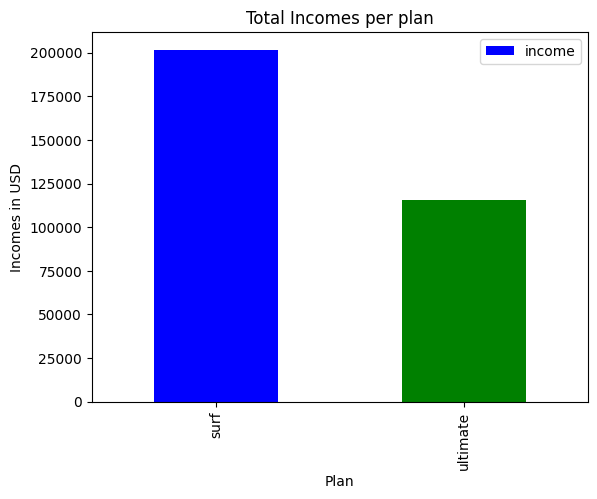

In [121]:
total_incomes.plot(kind='bar',
        x = 'plan',
        y = 'income',
        xlabel = 'Plan',
        ylabel = 'Incomes in USD',
        title = 'Total Incomes per plan',
        color = ['blue','green'],
        legend = ['surf incomes','ultimate incomes'])


plt.show()

Si observamos la primera gráfica vemos que el plan ULTIMATE generó mas ingresos que el plan surf por aproximadamente 2 000 dolares.

Algo a resaltar es que los usuarios del plan SURF se excedieron bastante en su consumo de mensajes, minutos y mb, lo que aumentó bastante el ingreso de éste plan, por lo tanto, considerando que los ingresos del plan ULTIMATE fueron mayores mes a mes y en cantidad general, mi recomendacón sería que identificaramos a los clientes del plan SURF que más suelen excederse mes a mes y ofrecer un cambio de plan. 

## Prueba las hipótesis estadísticas

### Los ingresos promedio del plan Ultimate y Surf son diferentes

Tenemos la hipótesis de que los ingresos promedio del plan Ultimate y Surf son diferentes, por lo tanto, debemos comparar las medias entre poblaciones, por lo que las hipotesis nula y alternativa quedaria como:

                                          H0: mean_surf_poblation_incomes = mean_ultimate_poblation_incomes
                                          H1: mean_surf_poblation_incomes != mean_ultimate_poblation_incomes

Debemos extraer una muestra de cada DataFrame filtrado en la parte de ingresos para obtener nuestras dos poblaciones:
   

ULTIMATE:

    1. 32 valores de ultimate_no_excess
    2. 32 valores de ultimate_mb_excess

In [122]:
u_sample_1 = ultimate_no_excess['incomes'].sample(32,random_state = 1)
u_sample_2 = ultimate_mb_excess['incomes'].sample(32, random_state = 1)
ultimate_poblation = pd.concat([u_sample_1,u_sample_2])


SURF:

    1. 8 valores de surf_no_excess
    2. 8 valores de surf_minutes_excess
    3. 8 valores de surf_messages_excess
    4. 8 valores de surf_mb_excess
    5. 8 valores de surf_min_and_msg_excess
    6. 8 valores de surf_min_and_mb_excess
    7. 8 valores de surf_msg_and_mb_excess
    8. 8 valores de surf_msg_min_mb_excess
    

In [123]:
s_sample_1 = surf_no_excess['incomes'].sample(8,random_state = 1)
s_sample_2 = surf_minutes_excess['incomes'].sample(8,random_state = 1)
s_sample_3 = surf_messages_excess['incomes'].sample(8,random_state = 1)
s_sample_4 = surf_mb_excess['incomes'].sample(8,random_state = 1)
s_sample_5 = surf_min_and_msg_excess['incomes'].sample(8,random_state = 1)
s_sample_6 = surf_min_and_mb_excess['incomes'].sample(8,random_state = 1)
s_sample_7 = surf_msg_and_mb_excess['incomes'].sample(8,random_state = 1)
s_sample_8 = surf_msg_min_mb_excess['incomes'].sample(8,random_state = 1)

surf_poblation = pd.concat([s_sample_1,s_sample_2,s_sample_3,s_sample_4,s_sample_5,s_sample_6,s_sample_7,s_sample_8,])

In [124]:
# Prueba las hipótesis
alpha = 0.05

results = st.ttest_ind(ultimate_poblation, surf_poblation)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('NO podemos rechazar la hipotesis nula')

valor p:  0.2976365914948012
NO podemos rechazar la hipotesis nula


NO rechazamos la hipótesis nula, ya que existe un 29.7% de probabilidad de obtener los mismo resultados al repetir el experimento con nuevos datos aleatorios si H0 fuera verdadera. Existe una posibilidad considerable de rechazar la hipotsis nula siendo verdadera. 

Por lo tanto, aceptamos la hipótesis nula siendo asi que las medias de las poblaciones SON IGUALES.

### El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Debemos extraer los DataFrame de consumo adaptados a nuestras poblaciones, por lo que debemos filtrar INCOMES_DF para obtener solamente la informacion de la gente en NY-NJ y otro filtro para la información de las demás regiones, posteriormente extraeremos una muestra significativa del consumo de cada población para compararlas.

DATAFRAMES ULTIMATE NY-NJ:

In [125]:
u_ny_mb_excess= ultimate_mb_excess[ultimate_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
u_ny_no_excess= ultimate_no_excess[ultimate_no_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']

DATAFRAMES ULTIMATE OTRAS REGIONES:

In [126]:
u_others_mb_excess= ultimate_mb_excess[~(ultimate_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
u_others_no_excess= ultimate_no_excess[~(ultimate_no_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]

DATAFRAMES SURF NY-NJ:

In [127]:
s_ny_no_excess= surf_no_excess[surf_no_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
#s_ny_minutes_excess= surf_minutes_excess[surf_minutes_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
s_ny_messages_excess = surf_messages_excess[surf_messages_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
s_ny_mb_excess = surf_mb_excess[surf_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
s_ny_min_and_msg_excess = surf_min_and_msg_excess[surf_min_and_msg_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
s_ny_min_and_mb_excess = surf_min_and_mb_excess[surf_min_and_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
s_ny_msg_and_mb_excess = surf_msg_and_mb_excess[surf_msg_and_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
s_ny_msg_min_mb_excess = surf_msg_min_mb_excess[surf_msg_min_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']

DATAFRAMES SURF OTRAS REGIONES:

In [128]:
s_others_no_excess= surf_no_excess[~(surf_no_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
s_others_minutes_excess= surf_minutes_excess[~(surf_minutes_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
s_others_messages_excess = surf_messages_excess[~(surf_messages_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
s_others_mb_excess = surf_mb_excess[~(surf_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
s_others_min_and_msg_excess = surf_min_and_msg_excess[~(surf_min_and_msg_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
s_others_min_and_mb_excess = surf_min_and_mb_excess[~(surf_min_and_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
s_others_msg_and_mb_excess = surf_msg_and_mb_excess[~(surf_msg_and_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]
s_others_msg_min_mb_excess = surf_msg_min_mb_excess[~(surf_msg_min_mb_excess['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]

Ahora que tenemos los DataFrames definidos, debemos seleccionar las muestras de cada uno para obtener las poblaciones de igual tamaño.

POBLACION NY-NJ:

ULTIMATE:

        NY-NJ:
       
               1. 15 valores de u_ny_no_excess
               2. 15 valores de u_ny_mb_excess
 
 

In [129]:
u_ny_sample_1 = u_ny_mb_excess['incomes'].sample(15,random_state = 1)
u_ny_sample_2 = u_ny_no_excess['incomes'].sample(15,random_state = 1)

SURF:

        NY-NJ:
        
               1. 5 valores de s_ny_no_excess
               2. 5 valores de s_ny_minutes_excess
               3. 5 valores de s_ny_messages_excess
               4. 5 valores de s_ny_mb_excess
               5. 5 valores de s_ny_min_and_msg_excess
               6. 5 valores de s_ny_min_and_mb_excess
               7. 5 valores de s_ny_msg_and_mb_excess
               8. 5 valores de s_ny_msg_min_mb_excess
 

In [130]:
s_ny_sample_1 = s_ny_no_excess['incomes'].sample(5,random_state = 1)
s_ny_sample_2 = s_ny_mb_excess['incomes'].sample(5,random_state = 1)
s_ny_sample_3 = s_ny_min_and_msg_excess['incomes'].sample(5,random_state = 1)
s_ny_sample_4 = s_ny_min_and_mb_excess['incomes'].sample(5,random_state = 1)
s_ny_sample_5 = s_ny_msg_and_mb_excess['incomes'].sample(5,random_state = 1)
s_ny_sample_6 = s_ny_msg_min_mb_excess['incomes'].sample(5,random_state = 1)

In [131]:
ny_poblation = pd.concat([u_ny_sample_1,u_ny_sample_2,s_ny_sample_1,s_ny_sample_2,s_ny_sample_3,s_ny_sample_4,
                          s_ny_sample_5,s_ny_sample_6])

POBLACION OTRAS REGIONES:

ULTIMATE: 
        
        Otras regiones:
    
               1. 10 valores de ultimate_no_excess
               2. 10 valores de ultimate_no_excess

In [132]:
u_others_sample_1 = u_others_mb_excess['incomes'].sample(10,random_state = 1)
u_others_sample_2 = u_others_no_excess['incomes'].sample(10,random_state = 1)

SURF:

        Otras regiones:
        
               1. 5 valores de s_others_no_excess
               2. 5 valores de s_others_minutes_excess
               3. 5 valores de s_others_messages_excess
               4. 5 valores de s_others_mb_excess
               5. 5 valores de s_others_min_and_msg_excess
               6. 5 valores de s_others_min_and_mb_excess
               7. 5 valores de s_others_msg_and_mb_excess
               8. 5 valores de s_others_msg_min_mb_excess
           

In [133]:
s_others_sample_1 = s_others_no_excess['incomes'].sample(5,random_state = 1)
s_others_sample_2 = s_others_minutes_excess['incomes'].sample(5,random_state = 1)
s_others_sample_3 = s_others_messages_excess['incomes'].sample(5,random_state = 1)
s_others_sample_4 = s_others_mb_excess['incomes'].sample(5,random_state = 1)
s_others_sample_5 = s_others_min_and_msg_excess['incomes'].sample(5,random_state = 1)
s_others_sample_6 = s_others_min_and_mb_excess['incomes'].sample(5,random_state = 1)
s_others_sample_7 = s_others_msg_and_mb_excess['incomes'].sample(5,random_state = 1)
s_others_sample_8 = s_others_msg_min_mb_excess['incomes'].sample(5,random_state = 1)

In [134]:
others_poblation = pd.concat([u_others_sample_1,u_others_sample_2,s_others_sample_1,s_others_sample_2,s_others_sample_3,
                              s_others_sample_4,s_others_sample_5,s_others_sample_6,s_others_sample_7,s_others_sample_8])

Tenemos la hipótesis de que los ingresos promedio de la gente en NY-NJ es diferente a la de otras regiones, por lo tanto, debemos comparar las medias entre poblaciones, por lo que las hipotesis nula y alternativa quedaria como:

                                       H0: mean_ny_poblation_incomes = mean_others_poblation_incomes
                                       H1: mean_ny_poblation_incomes != mean_others_poblation_incomes

In [135]:
# Prueba las hipótesis
alpha = 0.05

results = st.ttest_ind(others_poblation, ny_poblation)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('NO podemos rechazar la hipotesis nula')


valor p:  0.5217585272657581
NO podemos rechazar la hipotesis nula


En este caso no podemos rechazar la hipótesis nula porque excede por bastante nuestra significación estadística, lo cual implicaria rechazar H0 cuando es muy probable que sea verdadera. Es por esto que podemos decir que en realidad los ingresos promedio de las personas de NY-NJ son IGUALES a las de otras regiones como indica nuestra hipotesis nula.

## Conclusión general


1. En el consumo de minutos, mensajes y megabytes observamos una menor dispersion y por ende, una mayor 'constancia' en el consumo de nuestros clientes del plan ULTIMATE, a pesar de que nuestros clientes no se excedieron en su consumo, todo estuvo dentro de lo que incluye el plan, a diferencia de las personas que cuentan con el plan SURF, que practicamente tenemos usuarios en todas las combinaciones posibles de exceso en cuanto a consumo, lo que hizo que se dispararan los ingresos por este medio llegando a ser similares a los del otro plan, por lo que seria recomendable identificar a estos clientes y ofrecerles un cambio de plan a ULTIMATE. 

2. Las medias de los ingresos en cada tarifa son diferentes, lo cual nos indica que las poblaciones tienen un comportamiento diferente, lo cual tambien pudimos observar en las graficas de cajas y bigotes donde pudimos identificar la existencia de muchos valores atípicos,l producto de dichos comportamientos.